In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **FASHION MNIST CNN ANALYSIS Label Description**


*   0 T-shirt/top









* 1 Trouser  
*   2 Pullover

*   3 Dress
*   4 Coat


*   5 Sandal


*   6 Shirt
*  7 Sneaker

*  8 Bag
*   9 Ankle boot











In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
# Load the dataset fashion-mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [ ]:
#60000 : total no of images
#28*28 :shape of individual image
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

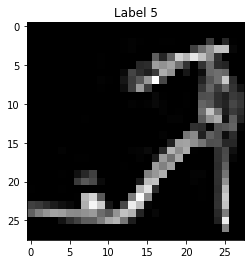

In [ ]:
plt.imshow(np.reshape(X_train[8], (28,28)), cmap = 'gray')
plt.title("Label %i" %Y_train[8])
plt.show()


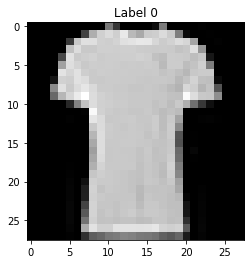

In [ ]:
plt.imshow(np.reshape(X_train[5999], (28,28)), cmap = 'gray')
plt.title("Label %i" %Y_train[5999])
plt.show()

In [ ]:
# Image pixel normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# changing range from 0-255 to 0-1
X_train[0]


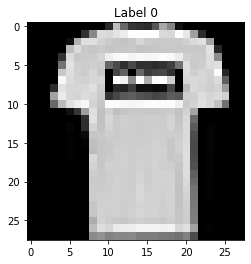

In [ ]:
plt.imshow(np.reshape(X_train[1], (28,28)), cmap = 'gray')
plt.title("Label %i" %Y_train[1])
plt.show()

In [ ]:
# Image pixel normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [ ]:
# changing range from 0-255 to 0-1
X_train[0]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.000000

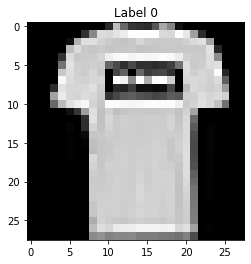

In [ ]:
plt.imshow(np.reshape(X_train[1], (28,28)), cmap = 'gray')
plt.title("Label %i" %Y_train[1])
plt.show()

In [ ]:
image_height = 28
image_width = 28

In [ ]:
# Grayscale image with num_channels (Rank = 1)
num_channels = 1

In [ ]:
# Reshaping of Image as per grayscale (60000, 28, 28, 1)
train_digits = np.reshape(X_train, newshape=(60000, image_height, image_width, num_channels))
test_digits = np.reshape(X_test, newshape=(10000, image_height, image_width, num_channels))


In [ ]:
# O/P Class is = 10 number of classes
# 0 - 9 num_classes
# 7 - [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# 5 - [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [ ]:
from keras.utils import to_categorical
num_classes = 10
train_labels_class = to_categorical(Y_train, num_classes)

In [ ]:
train_labels_class[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_train[1]

0

In [ ]:
test_labels_class = to_categorical(Y_test, num_classes)
test_labels_class[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_test[1]

2

**CNN Model**

In [ ]:
# Conv1D - csv files , signal files, ecg data
# Conv2D & Conv3D - RGB Images & Videos , UltraSound, Grayscale  etc

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam


In [ ]:
# CNN - Feedforeward Neural Network
def build_model():
  model = Sequential()

  # Layer - I - padding = 'same' : zero padding, padding = 'valid'
  model.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
                   input_shape = (image_height, image_width, num_channels)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Flatten Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units= 128, activation='relu'))

  # Output Layer
  model.add(Dense(units = 10, activation='softmax'))

  # Model Compile
  optimizers = Adam(learning_rate=0.001)

  # loss = categorical_crossentropy
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [ ]:
history = model.fit(train_digits, train_labels_class, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 4s 5ms/step - loss: 0.9257 - accuracy: 0.6528 - val_loss: 0.6728 - val_accuracy: 0.7390
Epoch 2/15
844/844 [==============================] - 4s 5ms/step - loss: 0.5951 - accuracy: 0.7801 - val_loss: 0.5370 - val_accuracy: 0.8027
Epoch 3/15
844/844 [==============================] - 4s 5ms/step - loss: 0.5062 - accuracy: 0.8133 - val_loss: 0.4653 - val_accuracy: 0.8277
Epoch 4/15
844/844 [==============================] - 4s 5ms/step - loss: 0.4480 - accuracy: 0.8359 - val_loss: 0.4502 - val_accuracy: 0.8378
Epoch 5/15
844/844 [==============================] - 4s 5ms/step - loss: 0.4063 - accuracy: 0.8517 - val_loss: 0.4084 - val_accuracy: 0.8505
Epoch 6/15
844/844 [==============================] - 4s 5ms/step - loss: 0.3816 - accuracy: 0.8602 - val_loss: 0.3834 - val_accuracy: 0.8570
Epoch 7/15
844/844 [==============================] - 4s 5ms/step - loss: 0.3602 - accuracy: 0.8684 - val_loss: 0.3756 - val_accuracy: 0.8622
Epoch 

In [ ]:
model.evaluate(test_digits, test_labels_class)

313/313 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.8837


[0.32007113099098206, 0.8837000131607056]

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.925657,0.652815,0.672799,0.739000
1,0.595056,0.780111,0.537035,0.802667
2,0.506217,0.813315,0.465317,0.827667
3,0.448043,0.835907,0.450233,0.837833
4,0.406340,0.851704,0.408410,0.850500
5,0.381615,0.860185,0.383449,0.857000
6,0.360235,0.868407,0.375613,0.862167
7,0.343926,0.872185,0.365244,0.863000
8,0.329893,0.878185,0.344946,0.871167
9,0.318279,0.881519,0.343258,0.874000


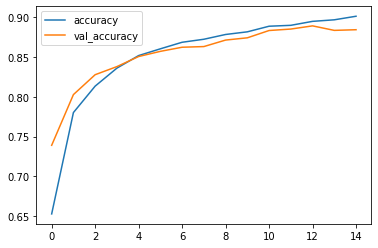

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [ ]:
from keras.layers import Dropout

In [ ]:
# CNN - Feedforeward Neural Network
def build_model():
  model = Sequential()

  # Layer - I - padding = 'same' : zero padding, padding = 'valid'
  model.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',
                   input_shape = (image_height, image_width, num_channels)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # Flatten Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units= 128, activation='relu'))
  model.add(Dropout(0.3))

  # Output Layer
  model.add(Dense(units = 10, activation='softmax'))

  # Model Compile
  optimizers = Adam(learning_rate=0.001)

  # loss = categorical_crossentropy
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)        

In [ ]:
history = model.fit(train_digits, train_labels_class, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 5s 6ms/step - loss: 1.1426 - accuracy: 0.5670 - val_loss: 0.6526 - val_accuracy: 0.7517
Epoch 2/15
844/844 [==============================] - 5s 5ms/step - loss: 0.6930 - accuracy: 0.7381 - val_loss: 0.5823 - val_accuracy: 0.7805
Epoch 3/15
844/844 [==============================] - 5s 5ms/step - loss: 0.6195 - accuracy: 0.7657 - val_loss: 0.5116 - val_accuracy: 0.8033
Epoch 4/15
844/844 [==============================] - 5s 5ms/step - loss: 0.5680 - accuracy: 0.7852 - val_loss: 0.4684 - val_accuracy: 0.8218
Epoch 5/15
844/844 [==============================] - 5s 6ms/step - loss: 0.5281 - accuracy: 0.8006 - val_loss: 0.4415 - val_accuracy: 0.8330
Epoch 6/15
844/844 [==============================] - 5s 6ms/step - loss: 0.5036 - accuracy: 0.8107 - val_loss: 0.4353 - val_accuracy: 0.8378
Epoch 7/15
844/844 [==============================] - 5s 5ms/step - loss: 0.4790 - accuracy: 0.8191 - val_loss: 0.4103 - val_accuracy: 0.8448
Epoch 

In [ ]:
model.evaluate(test_digits, test_labels_class)

313/313 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8648


[0.3665830194950104, 0.864799976348877]

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.142638,0.567019,0.652561,0.751667
1,0.693003,0.738111,0.582335,0.780500
2,0.619549,0.765667,0.511570,0.803333
3,0.568036,0.785167,0.468361,0.821833
4,0.528113,0.800648,0.441528,0.833000
5,0.503560,0.810667,0.435304,0.837833
6,0.478952,0.819148,0.410325,0.844833
7,0.463572,0.826000,0.378327,0.857667
8,0.449410,0.832037,0.371019,0.858667
9,0.434031,0.838241,0.367497,0.857333


In [ ]:
predictions = model.predict(test_digits)

In [ ]:
# Converts categorical o/p into integer o/p
yhat = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, yhat)


array([[809,   0,  26,  25,   4,   3, 128,   1,   4,   0],
       [  2, 975,   1,  12,   3,   0,   7,   0,   0,   0],
       [ 11,   0, 852,   9,  69,   0,  58,   0,   1,   0],
       [ 13,   9,  19, 874,  39,   1,  43,   0,   2,   0],
       [  1,   1, 174,  32, 716,   0,  74,   0,   2,   0],
       [  0,   0,   0,   0,   0, 959,   0,  33,   0,   8],
       [151,   0, 142,  22,  74,   0, 601,   0,  10,   0],
       [  0,   0,   0,   0,   0,  11,   0, 966,   0,  23],
       [  0,   1,  12,   2,   2,   2,   5,   5, 970,   1],
       [  1,   0,   0,   0,   0,  12,   0,  61,   0, 926]])

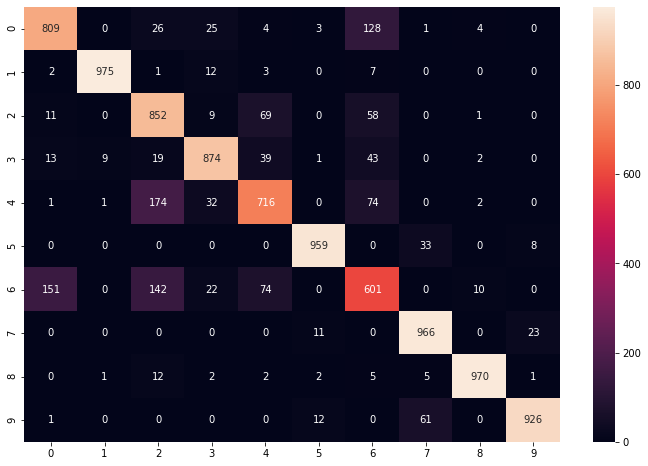

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(Y_test , yhat), annot=True, fmt='0.0f')

In [ ]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.69      0.85      0.77      1000
           3       0.90      0.87      0.88      1000
           4       0.79      0.72      0.75      1000
           5       0.97      0.96      0.96      1000
           6       0.66      0.60      0.63      1000
           7       0.91      0.97      0.94      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



**New Prediction**

In [ ]:
import cv2

In [ ]:
# 0 - Gray Scale
img = cv2.imread('/content/tshirt', 0)

In [ ]:
img.shape

(1334, 1000)

In [ ]:
test_digits.shape

(10000, 28, 28, 1)

In [ ]:
img_data = cv2.resize(img, (28,28))

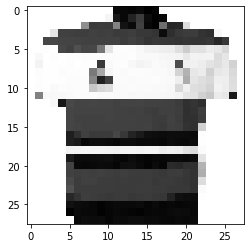

In [ ]:
plt.imshow(img_data, cmap = 'gray')


In [ ]:
# Bitwise operation not for image samples
img_data = cv2.bitwise_not(img_data)


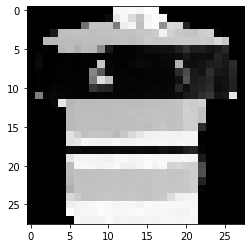

In [ ]:
plt.imshow(img_data, cmap = 'gray')

In [ ]:
# input shape (1, 28, 28, 1)
img_new = np.reshape(img_data, (1, image_height, image_width, num_channels))


In [ ]:
np.argmax(model.predict(img_new))

2

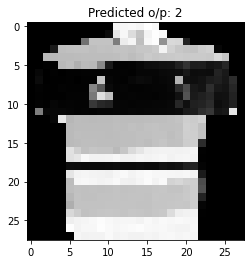

In [ ]:
plt.imshow(img_data, cmap = 'gray')
plt.title("Predicted o/p: %i" %np.argmax(model.predict(img_new)))
plt.show()
